In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# download daily data for AAPL, remove timezone from date index, and save to CSV
(
    yf.Ticker(ticker='AAPL')
    .history(period='max', auto_adjust=False)
    .assign(Date = lambda x: x.index.tz_localize(None))
    .set_index('Date')
    .loc[:'2023-01']
    .to_csv('aapl.csv')
)
aapl = pd.read_csv('aapl.csv', index_col='Date', parse_dates=True)
aapl

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-01-25,140.889999,142.429993,138.809998,141.860001,140.383728,65799300,0.0,0.0
2023-01-26,143.169998,144.250000,141.899994,143.960007,142.461884,54105100,0.0,0.0
2023-01-27,143.160004,147.229996,143.080002,145.929993,144.411392,70555800,0.0,0.0


In [3]:
# download daily factors and save to CSV
(
    pdr.DataReader(
        name='F-F_Research_Data_Factors_daily',
        data_source='famafrench',
        start='1900'
    )
    [0]
    .to_csv('ff.csv')
)

ff = pd.read_csv('ff.csv', index_col='Date', parse_dates=True)
ff

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2024-10-25,-0.09,-0.01,-0.83,0.017
2024-10-28,0.38,1.15,0.61,0.017
2024-10-29,0.15,0.12,-1.05,0.017


Calculate the daily decimal returns for AAPL and add them as a new column, Returns, to the DataFrame aapl. Next, compute the Sharpe Ratio (SR) for AAPL over the period from October 2011 through October 2019 (inclusive), using the risk-free rate of return as the benchmark, and assign it to a float variable sr. Additionally, create a plot of AAPL's cumulative returns from January 2000 through January 2023 (inclusive), displaying the cumulative returns as percentages and ensuring the plot is clearly labeled.

In [4]:
returns = aapl['Adj Close'].pct_change()
    #Returns = returns.apply(lambda x: x + 1)
Returns = returns[0] / 100

aapl['Returns'] = returns
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600,0.0,0.0,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800,0.0,0.0,-0.052171
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000,0.0,0.0,-0.073398
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600,0.0,0.0,0.024752
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600,0.0,0.0,0.028992


/var/folders/rc/73bxmvd90cq7m_zqblckv8m80000gn/T/ipykernel_82588/498763394.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharpe_data['Returns'] = sharpe_data['Adj Close'].pct_change()


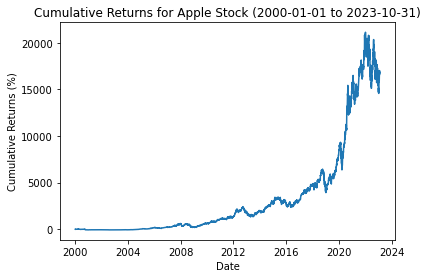

Sharpe Ratio: 0.058778585439406304


In [6]:
def analyze_aapl_data(aapl, sharpe_start, sharpe_end, cumret_start, cumret_end, risk_free_rate=0.0):
    """
    Analyze AAPL stock data by calculating the Sharpe Ratio for a specified range 
    and plotting cumulative returns for another specified range.
    
    Parameters:
    - aapl: DataFrame containing 'Adj Close' column with historical data.
    - sharpe_start: Start date for Sharpe Ratio calculation (YYYY-MM-DD).
    - sharpe_end: End date for Sharpe Ratio calculation (YYYY-MM-DD).
    - cumret_start: Start date for cumulative returns calculation (YYYY-MM-DD).
    - cumret_end: End date for cumulative returns calculation (YYYY-MM-DD).
    - risk_free_rate: The risk-free rate used in the Sharpe Ratio calculation (default is 0.0).

    Returns:
    - sr: Sharpe Ratio for the specified date range.
    - Plot of cumulative returns.
    """
    # Calculate Sharpe Ratio
    sharpe_data = aapl.loc[sharpe_start:sharpe_end]
    sharpe_data['Returns'] = sharpe_data['Adj Close'].pct_change()
    mean_returns = sharpe_data['Returns'].mean()
    std_dev_returns = sharpe_data['Returns'].std()
    sr = mean_returns / std_dev_returns  # Risk-free rate is 0, so omitted

    # Calculate and plot cumulative returns
    cumret_data = aapl.loc[cumret_start:cumret_end]
    returns = cumret_data['Adj Close'].pct_change()
    cumulative_returns = (1 + returns).cumprod() - 1

    plt.plot(cumulative_returns * 100)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns (%)")
    plt.title("Cumulative Returns for Apple Stock ({} to {})".format(cumret_start, cumret_end))
    plt.show()

    return sr

# Example Usage
sharpe_start = '2011-10-01'
sharpe_end = '2019-10-31'
cumret_start = '2000-01-01'
cumret_end = '2023-10-31'

# Assuming 'aapl' is a DataFrame with an 'Adj Close' column
sr = analyze_aapl_data(aapl, sharpe_start, sharpe_end, cumret_start, cumret_end)
print("Sharpe Ratio:", sr)

Calculate the daily decimal returns for AAPL and TSLA and add these to the yahoo data frame under a new outer index level named Returns. Compute the monthly mean and standard deviation of returns for AAPL and TSLA from 2015 through 2022 (inclusive), and assign the resulting data frame to yahoo_m, keeping the values as daily decimal returns. Next, create a portfolio with weights $w_{AAPL} = \frac{1}{3}$ and $w_{TSLA} = \frac{2}{3}$, assigning the daily decimal returns for this portfolio to a series yahoo_p. Finally, calculate the total return of the portfolio from 2014 to 2022 (inclusive) and assign the result to totret, expressed as a decimal return.

In [7]:
def download_and_prepare_yahoo_data(tickers, start_year, end_year, file_name):
    """
    Download daily data for specified tickers, process it for analysis, and save to CSV.

    Args:
        tickers (list): List of stock tickers to download.
        start_year (str): Starting year for filtering data.
        end_year (str): Ending year for filtering data.
        file_name (str): Name of the CSV file to save processed data.

    Returns:
        pd.DataFrame: Processed DataFrame with added daily returns.
    """
    # Download and process data
    yahoo_data = (
        yf.Tickers(tickers=tickers)
        .history(period='max', auto_adjust=False, progress=False)
        .assign(Date=lambda x: x.index.tz_localize(None))
        .set_index('Date')
        .loc[start_year:end_year]
    )

    # Save to CSV
    yahoo_data.to_csv(file_name)

    # Load data for analysis
    yahoo = (
        pd.read_csv(
            filepath_or_buffer=file_name,
            header=[0, 1],
            index_col=0,
            parse_dates=True
        )
        .rename_axis(columns=['Variable', 'Ticker'])
    )

    # Calculate daily returns
    returns = yahoo['Adj Close'].pct_change().dropna()
    returns.columns = pd.MultiIndex.from_product([['Returns'], returns.columns])

    # Combine with the original data
    yahoo = pd.concat([yahoo, returns], axis=1)

    return yahoo

# Example usage
yahoo_df = download_and_prepare_yahoo_data(
    tickers=['AAPL', 'TSLA'], 
    start_year='2011', 
    end_year='2022', 
    file_name='yahoo.csv'
)
yahoo_df

Variable     Adj Close                   Close             Dividends       \
Ticker            AAPL        TSLA        AAPL        TSLA      AAPL TSLA   
Date                                                                        
2011-01-03    9.928852    1.774667   11.770357    1.774667       0.0  0.0   
2011-01-04    9.980670    1.778000   11.831786    1.778000       0.0  0.0   
2011-01-05   10.062313    1.788667   11.928571    1.788667       0.0  0.0   
2011-01-06   10.054179    1.858667   11.918929    1.858667       0.0  0.0   
2011-01-07   10.126183    1.882667   12.004286    1.882667       0.0  0.0   
...                ...         ...         ...         ...       ...  ...   
2022-12-23  130.487793  123.150002  131.860001  123.150002       0.0  0.0   
2022-12-27  128.676849  109.099998  130.029999  109.099998       0.0  0.0   
2022-12-28  124.728371  112.709999  126.040001  112.709999       0.0  0.0   
2022-12-29  128.261230  121.820000  129.610001  121.820000       0.0  0.0   
2022-12-30  128.577881  123.180000  129.929993  123.180000       0.0  0.0   

Variable          High                     Low                    Open  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2011-01-03   11.795000    1.800000   11.601429    1.726667   11.630000   
2011-01-04   11.875000    1.796667   11.719643    1.734667   11.872857   
2011-01-05   11.940714    1.793333   11.767857    1.746000   11.769643   
2011-01-06   11.973214    1.866667   11.889286    1.787333   11.954286   
2011-01-07   12.012500    1.905333   11.853571    1.860000   11.928214   
...                ...         ...         ...         ...         ...   
2022-12-23  132.419998  128.619995  129.639999  121.019997  130.919998   
2022-12-27  131.410004  119.669998  128.720001  108.760002  131.380005   
2022-12-28  131.029999  116.269997  125.870003  108.239998  129.669998   
2022-12-29  130.479996  123.570000  127.730003  117.500000  127.989998   
2022-12-30  129.949997  124.480003  127.430000  119.750000  128.410004   

Variable               Stock Splits          Volume                Returns  \
Ticker            TSLA         AAPL TSLA       AAPL         TSLA      AAPL   
Date                                                                         
2011-01-03    1.789333          0.0  0.0  445138400   19245000.0       NaN   
2011-01-04    1.777333          0.0  0.0  309080800   17811000.0  0.005219   
2011-01-05    1.765333          0.0  0.0  255519600   21700500.0  0.008180   
2011-01-06    1.788667          0.0  0.0  300428800   30918000.0 -0.000808   
2011-01-07    1.866667          0.0  0.0  311931200   33718500.0  0.007162   
...                ...          ...  ...        ...          ...       ...   
2022-12-23  126.370003          0.0  0.0   63814900  166989700.0 -0.002798   
2022-12-27  117.500000          0.0  0.0   69007800  208643400.0 -0.013878   
2022-12-28  110.349998          0.0  0.0   85438400  221070500.0 -0.030685   
2022-12-29  120.389999          0.0  0.0   75703700  221923300.0  0.028324   
2022-12-30  119.949997          0.0  0.0   77034200  157777300.0  0.002469   

Variable              
Ticker          TSLA  
Date                  
2011-01-03       NaN  
2011-01-04  0.001878  
2011-01-05  0.005999  
2011-01-06  0.039135  
2011-01-07  0.012912  
...              ...  
2022-12-23 -0.017551  
2022-12-27 -0.114089  
2022-12-28  0.033089  
2022-12-29  0.080827  
2022-12-30  0.011164  

[3020 rows x 18 columns]

In [11]:
yahoo_m = (
    yahoo_df
    .loc['2015':'2022', 'Adj Close']
    .pct_change()
    .groupby(pd.Grouper(freq='M'))
    .agg(['mean', 'std'])
)

yahoo_m

Ticker          AAPL                TSLA          
                mean       std      mean       std
Date                                              
2015-01-31  0.003927  0.024386 -0.003647  0.023153
2015-02-28  0.005144  0.012793  0.000203  0.023840
2015-03-31 -0.001357  0.013795 -0.003147  0.021811
2015-04-30  0.000348  0.012397  0.008869  0.023204
2015-05-31  0.002312  0.013944  0.005269  0.011319
...              ...       ...       ...       ...
2022-08-31 -0.001252  0.016234 -0.002960  0.025240
2022-09-30 -0.005864  0.023087 -0.001404  0.029443
2022-10-31  0.005297  0.026686 -0.006460  0.041021
2022-11-30 -0.001179  0.029983 -0.006487  0.043847
2022-12-31 -0.006033  0.018175 -0.020552  0.045541

[96 rows x 4 columns]

In [12]:
weights = [1/3, 2/3]
yahoo_p = yahoo_df.loc[:, ('Adj Close', ['AAPL', 'TSLA'])].pct_change().dot(weights)

# Total return from 2014 to 2022
start_date = '2014'
end_date = '2022'
totret = (yahoo_p.loc[start_date:end_date] + 1).prod() - 1
totret

12.40875422232033